In [96]:
%load_ext autoreload
%autoreload 2

import multiprocessing as mp
import torch
import wandb_util.wandb_util as wbu

torch.set_grad_enabled(False)
mp.set_start_method("spawn", force=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from omegaconf import OmegaConf
from scripts.wandb_experiments.texgen_vs_gr_experiment import TexGenVsGrExperimentConfig, texgen_vs_gr_experiment

config = TexGenVsGrExperimentConfig(
    texgen_prompt="Deadpool",
    gr_prompt="Deadpool, Blank Background",
    anim_tag='catwalk_180_20:latest',
    texturing_tag='human_mv:latest',
    seed=0
)
config = OmegaConf.structured(config)

In [12]:
wbu.sync_experiment(texgen_vs_gr_experiment, config, "catwalk_180_deadpool")


Would execute 3 new runs:
- GR
- ControlNet
- exp

Would delete 2 outdated runs:
- ControlNet                     (f1rltzoh)
- GR                             (zhrjydn3)

Do you want to continue? (y/n)
Deleting 2 runs
Executing 3 runs


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250418_140824-ctdy651e
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run GR
wandb: ⭐️ View project at https://wandb.ai/romeu/diffusion-3D-features
wandb: 🚀 View run at https://wandb.ai/romeu/diffusion-3D-features/runs/ctdy651e
wandb:   4 of 4 files downloaded.  
100%|██████████| 10/10 [00:27<00:00,  2.70s/it]


Moviepy - Building video /tmp/tmpe2o9gfvt.mp4.
Moviepy - Writing video /tmp/tmpe2o9gfvt.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmpe2o9gfvt.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/video/video)... Done. 0.0s
wandb:                                                                                
wandb: 
wandb: Run summary:
wandb: hash 428a22e9afd7dc6723aa...
wandb: 
wandb: 🚀 View run GR at: https://wandb.ai/romeu/diffusion-3D-features/runs/ctdy651e
wandb: ⭐️ View project at: https://wandb.ai/romeu/diffusion-3D-features
wandb: Synced 5 W&B file(s), 0 media file(s), 21 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20250418_140824-ctdy651e/logs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250418_140916-3ey93fo4
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ControlNet
wandb: ⭐️ View project at https://wandb.ai/r

Moviepy - Building video /tmp/tmpumc4k6wv.mp4.
Moviepy - Writing video /tmp/tmpumc4k6wv.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmpumc4k6wv.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/video/video)... Done. 0.0s
wandb:                                                                                
wandb: 
wandb: Run summary:
wandb: hash 21bfc68e1a04792398e8...
wandb: 
wandb: 🚀 View run ControlNet at: https://wandb.ai/romeu/diffusion-3D-features/runs/3ey93fo4
wandb: ⭐️ View project at: https://wandb.ai/romeu/diffusion-3D-features
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20250418_140916-3ey93fo4/logs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250418_140950-shzlijen
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run exp
wandb: ⭐️ View project at https://wandb.ai/r

In [91]:
from scripts.wandb_experiments.texgen_vs_gr_experiment import get_exp_data

data = get_exp_data("catwalk_180_deadpool")

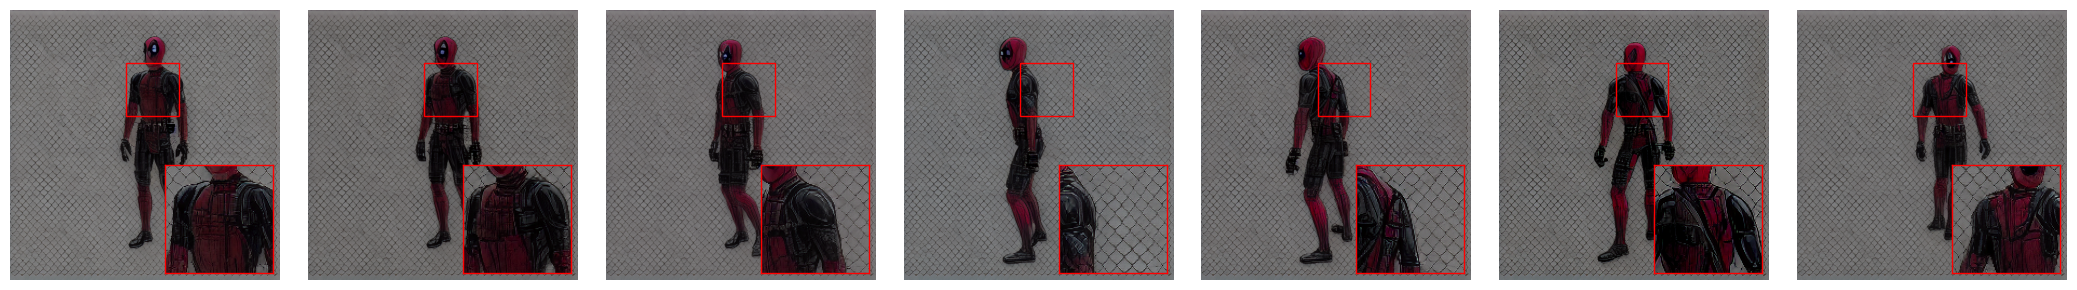

In [95]:
from matplotlib import pyplot as plt
from matplotlib.transforms import Bbox
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims
from text3d2video.utilities.matplotlib_utils import add_zoom_inset


frame_indices = ordered_sample_indices(data.gr_frames, 7)
gr_frames = [data.gr_frames[i] for i in frame_indices]

fig, axs = display_ims(gr_frames, show=False)

for ax in axs:
    box = Bbox.from_bounds(220, 100, 100, 100)
    add_zoom_inset(ax, box)

plt.savefig("outs/180_deadpool_content_drift.pdf", dpi=300, bbox_inches="tight")

In [44]:
cams = data.cams
meshes = data.meshes
verts_uvs = data.anim_verts_uvs
faces_uvs = data.anim_faces_uvs

faces_uvs

tensor([[    0,     1,     2],
        [    1,     3,     2],
        [    4,     5,     2],
        ...,
        [11047, 11046, 15540],
        [15541, 11045, 11050],
        [10418, 15581, 15542]], device='cuda:0')

In [74]:
from torch import Tensor
from text3d2video.utilities.geometry_processing import evaluate_mesh_at_uv

coord = evaluate_mesh_at_uv(meshes[0], Tensor([0.5, 0.5]).cuda(), verts_uvs, faces_uvs)

In [75]:
uv_coord = Tensor([0.5, 0.5]).cuda()

for mesh, cam in zip(meshes, cams):
    point_3D = evaluate_mesh_at_uv(mesh, uv_coord, verts_uvs, faces_uvs)

In [89]:
from text3d2video.rendering import UVShader, make_mesh_rasterizer
from text3d2video.util import sample_feature_map_ndc
from text3d2video.utilities.geometry_processing import uv_at_ndc_coords
from text3d2video.utilities.rerun_util import feature_map

mesh = meshes[0]
cam = cams[0]

uv_at_ndc_coords(cam, mesh, verts_uvs, faces_uvs, Tensor([[0, 0]]).cuda())

tensor([[0.1521, 0.9271]], device='cuda:0')

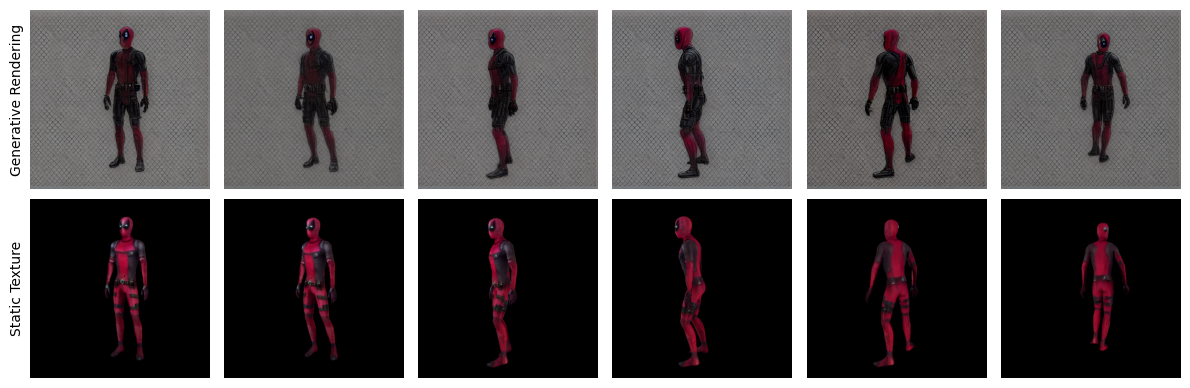

In [16]:
from matplotlib.transforms import Bbox
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims_grid

frame_indices = ordered_sample_indices(data.gr_frames, 6)
gr_frames = [data.gr_frames[i] for i in frame_indices]
renders = [data.renders[i] for i in frame_indices]

fig, axs = display_ims_grid(
    [gr_frames, renders],
    row_titles=["Generative Rendering", "Static Texture"],
    show=False,
    scale=2
)

zoom_box = Bbox.from_bounds(210, 70, 100, 100)

# for ax in axs[0]:
#     add_zoom_inset(ax, zoom_box)

# for ax in axs[1]:
#     add_zoom_inset(ax, zoom_box)

# fig.savefig("outs/metalic_cat.pdf", dpi=300, bbox_inches="tight")

In [72]:
from scripts.wandb_experiments.texgen_vs_gr_experiment import comparison_vid
from text3d2video.utilities.ipython_utils import display_vid

display_vid(comparison_vid(data), width=1000)